# Churn Analysis

Dataset: https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

In [1]:
# packages
import pandas as pd # data manipulation
import numpy as np # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from sklearn.preprocessing import LabelEncoder  # enconding categorical data
from sklearn.model_selection import train_test_split # split into train and test the dataset
from sklearn.preprocessing import StandardScaler # scaling
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.metrics import accuracy_score # accuracy
from sklearn.metrics import balanced_accuracy_score # balanced accuracy
from sklearn.metrics import confusion_matrix  # confusion matrix
from sklearn import metrics # confusion matrix graphs
from scipy import stats # normal test

In [2]:
# directory
pkgdir = '.../' 

In [3]:
# import dataset
data = pd.read_csv(f'{pkgdir}/bigml_59c28831336c6604c800002a.csv')

Descritptive Analysis

In [4]:
# dimension
data.shape

(3333, 21)

In [5]:
# columns names
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
# str
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# head
data.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [8]:
# summary
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
data[['international plan','voice mail plan','churn']].apply(lambda x: x.value_counts())

,international plan,voice mail plan,churn
no,3010.0,2411.0,NaN
yes,323.0,922.0,NaN
False,NaN,NaN,2850.0
True,NaN,NaN,483.0


Let's cross the churn variable with some interesting variables for an analysis

In [10]:
data.groupby('state')['churn'].value_counts()

state  churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: churn, Length: 102, dtype: int64

In [11]:
data.groupby('customer service calls')['churn'].value_counts()

customer service calls  churn
0                       False     605
                        True       92
1                       False    1059
                        True      122
2                       False     672
                        True       87
3                       False     385
                        True       44
4                       False      90
                        True       76
5                       True       40
                        False      26
6                       True       14
                        False       8
7                       True        5
                        False       4
8                       False       1
                        True        1
9                       True        2
Name: churn, dtype: int64

In [12]:
data.groupby('international plan')['churn'].value_counts()

international plan  churn
no                  False    2664
                    True      346
yes                 False     186
                    True      137
Name: churn, dtype: int64

In [13]:
137/(186+137)

0.4241486068111455

In [14]:
2664/(2664+346)

0.8850498338870432

In [15]:
data.groupby('voice mail plan')['churn'].value_counts()

voice mail plan  churn
no               False    2008
                 True      403
yes              False     842
                 True       80
Name: churn, dtype: int64

Data visualization

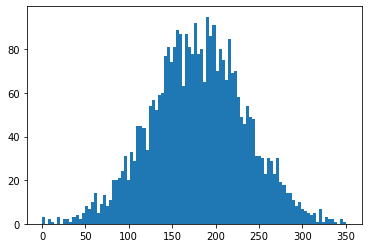

In [16]:
# day minutes
plt.hist(data['total day minutes'], bins = 100) 
plt.show() 

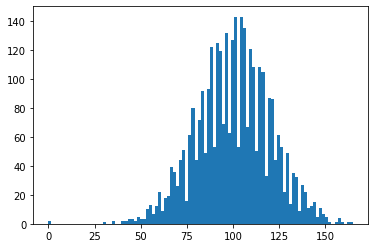

In [17]:
# day calls
plt.hist(data['total day calls'], bins = 100) 
plt.show() 

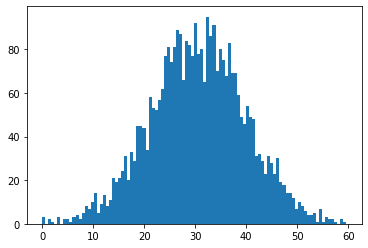

In [18]:
# day charge
plt.hist(data['total day charge'], bins = 100) 
plt.show() 

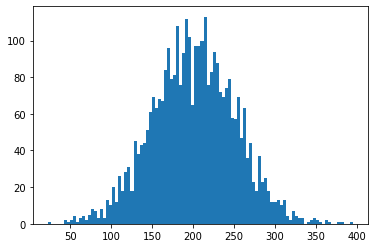

In [19]:
# night minutes
plt.hist(data['total night minutes'], bins = 100) 
plt.show() 

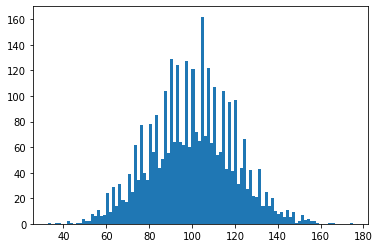

In [20]:
# night calls
plt.hist(data['total night calls'], bins = 100) 
plt.show() 

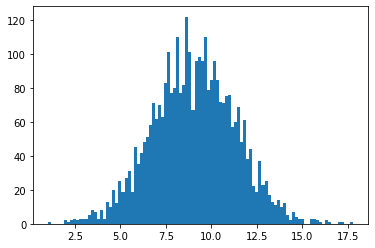

In [21]:
# night charge
plt.hist(data['total night charge'], bins = 100) 
plt.show() 

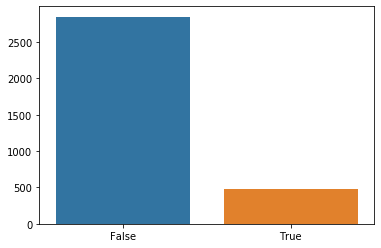

In [22]:
# churn
sns.barplot(data["churn"].value_counts().index, data["churn"].value_counts().values)

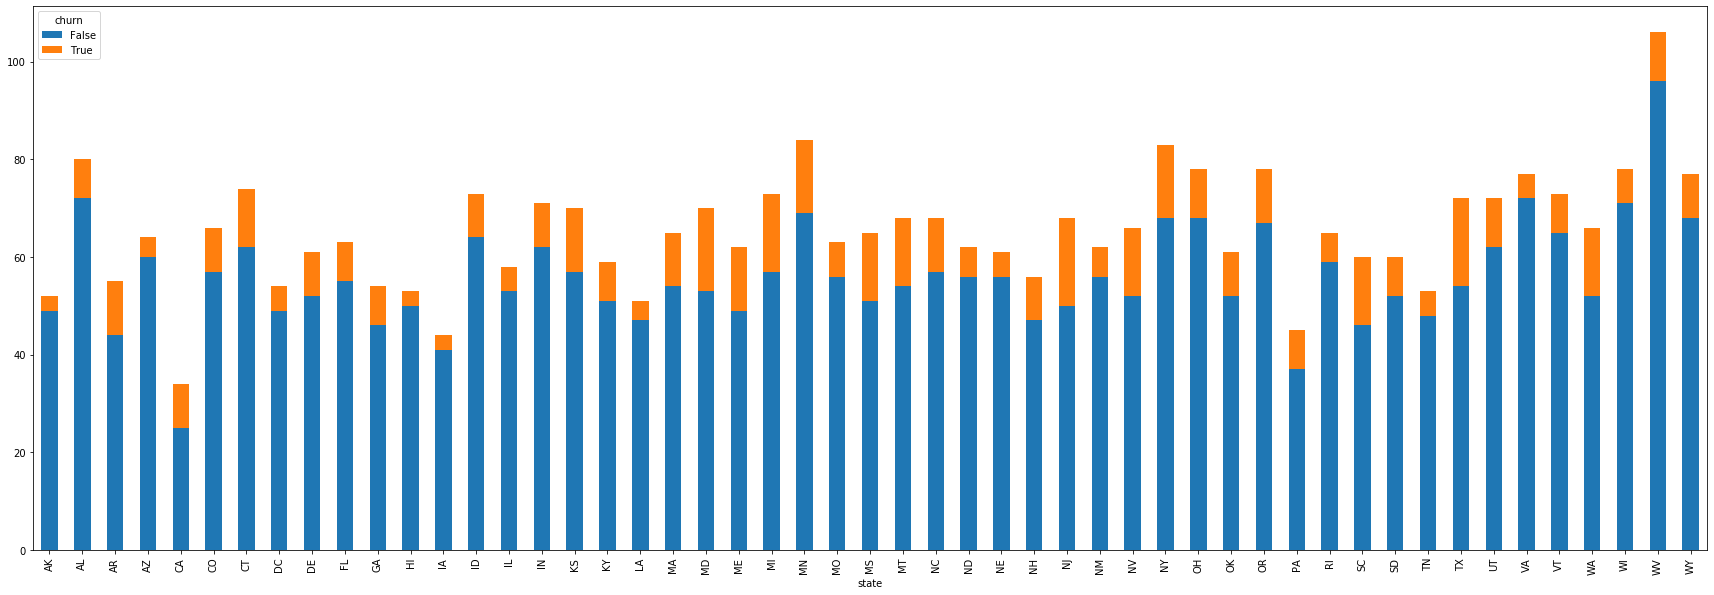

In [23]:
# churn vs state
data.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

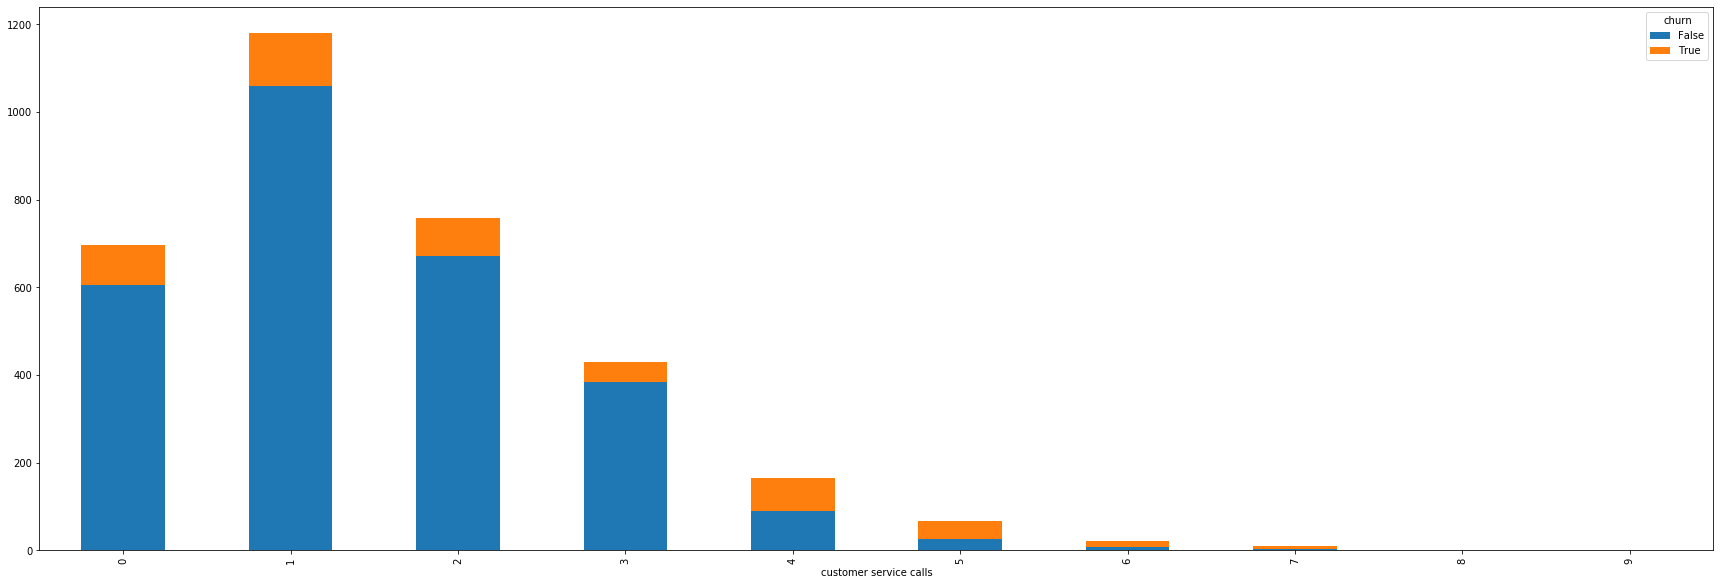

In [24]:
# churn vs customer service calls
data.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

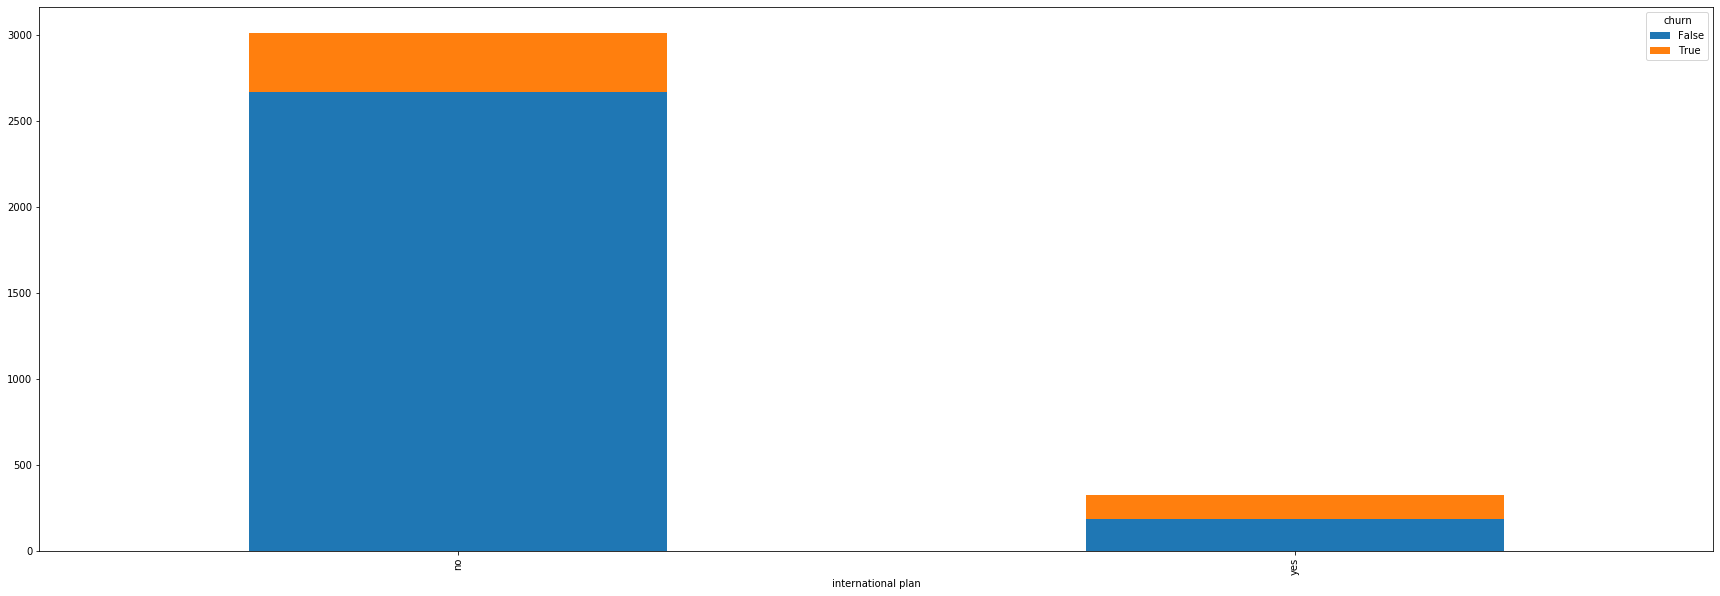

In [25]:
# churn vs international plan
data.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

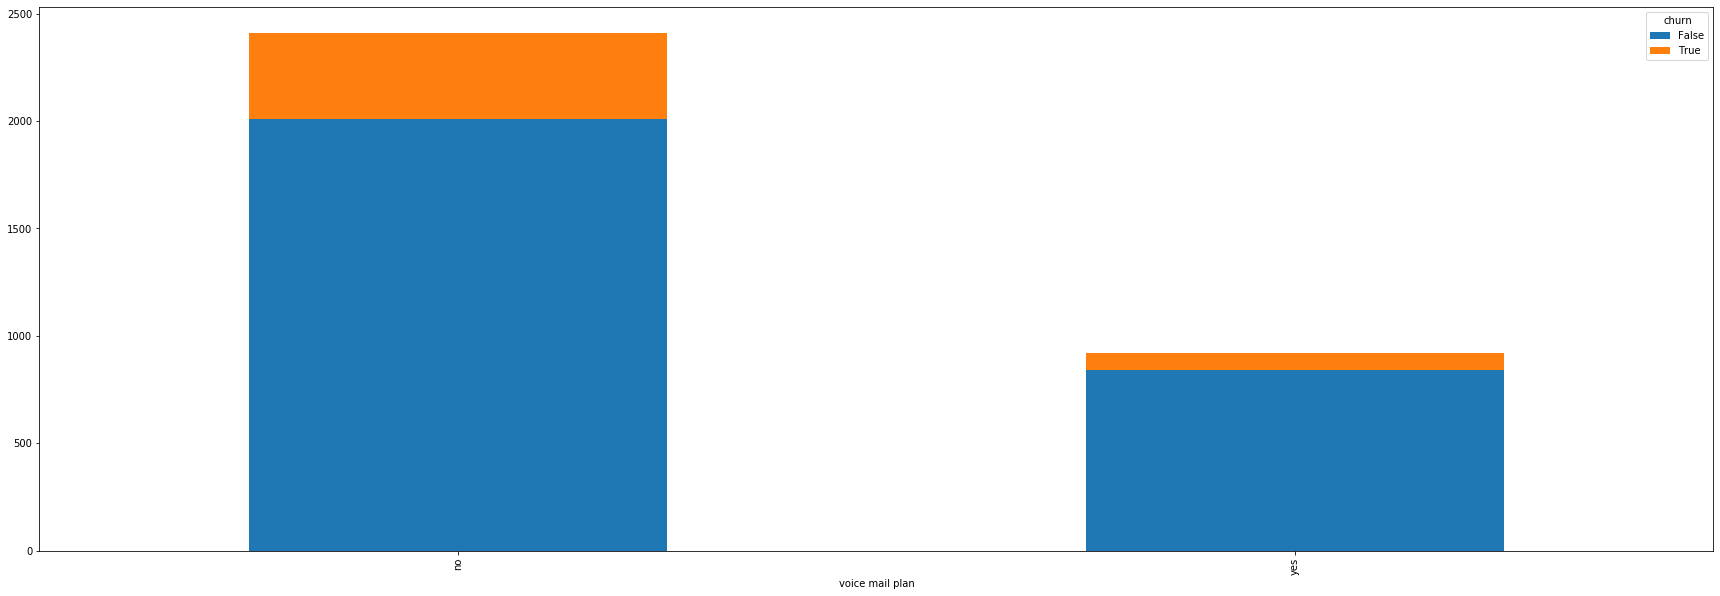

In [26]:
# churn vs voice mail plan
data.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

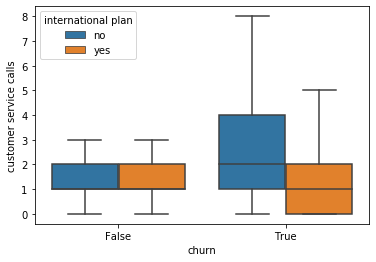

In [27]:
# box plot churn vs customer service calls 
sns.boxplot(x = 'churn', y = 'customer service calls', data = data, sym = "", hue = "international plan")  
plt.show() 

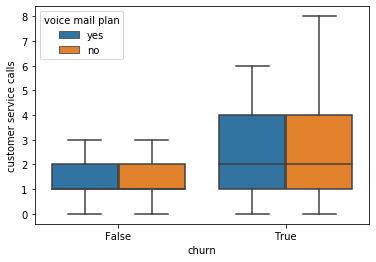

In [28]:
# box plot churn vs customer service calls 
sns.boxplot(x = 'churn', y = 'customer service calls', data = data, sym = "", hue = "voice mail plan")  
plt.show() 

Hypothesis testing

In [29]:
aux = data.iloc[:,6:19] # only quantitative variables
for i in range(0, aux.shape[1]):
    k2, p = stats.normaltest(aux.iloc[:,i])
    if p >= 0.1:
        print("p>=0.1",p,aux.columns[i])
    else:
        print("p<0.1",p,aux.columns[i])

p<0.1 1.5392941776140257e-121 number vmail messages
p>=0.1 0.7750632974814358 total day minutes
p<0.1 0.0010325088208268448 total day calls
p>=0.1 0.7752203400325994 total day charge
p>=0.1 0.8048462429604736 total eve minutes
p<0.1 0.03318428808943874 total eve calls
p>=0.1 0.8055046253944554 total eve charge
p>=0.1 0.5839922583028743 total night minutes
p>=0.1 0.5229778021474127 total night calls
p>=0.1 0.5850814396785253 total night charge
p<0.1 1.1401748114019145e-14 total intl minutes
p<0.1 2.9384245140168735e-182 total intl calls
p<0.1 1.0991526450917466e-14 total intl charge


Model

In [30]:
# transforming all variables as text into numbers, while still being qualitative
label_encoder = LabelEncoder() 
data['state'] = label_encoder.fit_transform(data['state'])
data['international plan'] = label_encoder.fit_transform(data['international plan'])
data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan'])
# remove irrelevant variables
data.drop(["phone number"], axis = 1, inplace=True)

In [31]:
# feature and labels 
labels = data.iloc[:, 0:19].values 
feature = data.loc[:, 'churn'].values 

In [32]:
# train and test
X_train, X_test, y_train, y_test = train_test_split(labels, feature,  test_size = 0.25,  random_state = 0) 

In [33]:
# operations inside the datasets - scaling
scaling = StandardScaler() 
X_train = scaling.fit_transform(X_train) 
X_test = scaling.transform(X_test) 

In [34]:
# random forest 

# instantiate the classifier 
class_model = RandomForestClassifier() 
  
# fit to the training data 
class_model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
# predictions
forecast_model = class_model.predict(X_test) 

In [36]:
X_test.shape

(834, 19)

In [37]:
len(forecast_model)

834

In [38]:
forecast_model

array([False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False,

In [39]:
# accuracy 
accuracy_score(y_test, forecast_model)

0.9628297362110312

In [40]:
# balanced accuracy
balanced_accuracy_score(y_test, forecast_model)

0.8944367176634214

In [41]:
# confusion matrix
confusion_matrix(y_test, forecast_model)

array([[711,   8],
       [ 23,  92]])

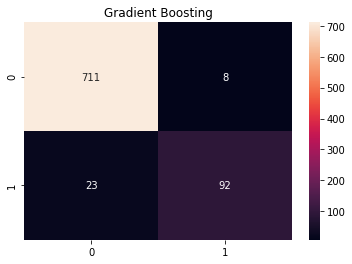

In [42]:
grad_ens_conf_matrix = metrics.confusion_matrix(y_test, forecast_model)
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

In [43]:
# numbers
TP = 709
TN = 91
FP = 10
FN = 24

In [44]:
# pecision
TP/(TP+FP)

0.9860917941585535

In [45]:
# recall
TP/(TP+FN)

0.9672578444747613

[0.0243322  0.03193909 0.00883619 0.06006969 0.01964508 0.02893302
 0.14607222 0.03259217 0.13204144 0.06410822 0.02710759 0.0636187
 0.03796866 0.0305905  0.04127917 0.03759925 0.04762908 0.04281356
 0.12282419]


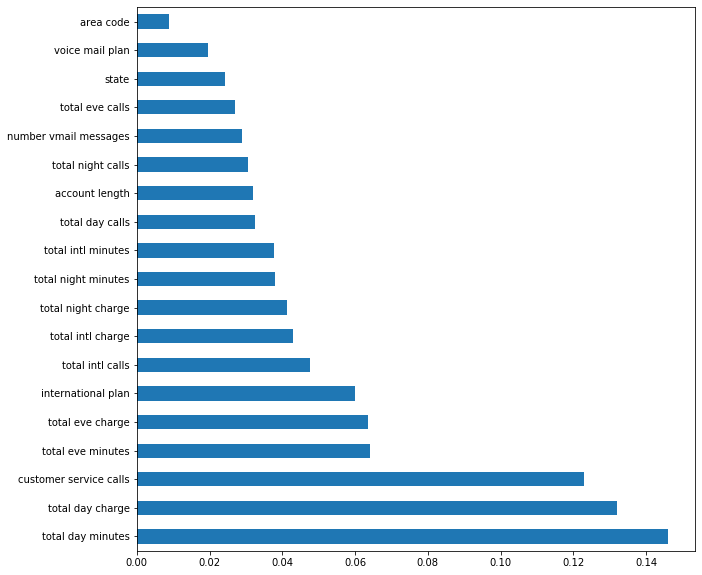

In [46]:
labels_relevants = class_model.feature_importances_
print(class_model.feature_importances_)
labels_relevants = pd.Series(class_model.feature_importances_, index=data.iloc[:,0:19].columns)
labels_relevants = labels_relevants.nlargest(19)
labels_relevants.plot(kind='barh' , figsize=(10,10))